In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import seaborn
import seaborn as sb

# import matplotlib
import matplotlib.pyplot as plt

In [2]:
# creating Dataframe object
df = pd.read_csv(R'winequalityN.csv')
print(df.head())
print(df.info())
print(df.describe())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

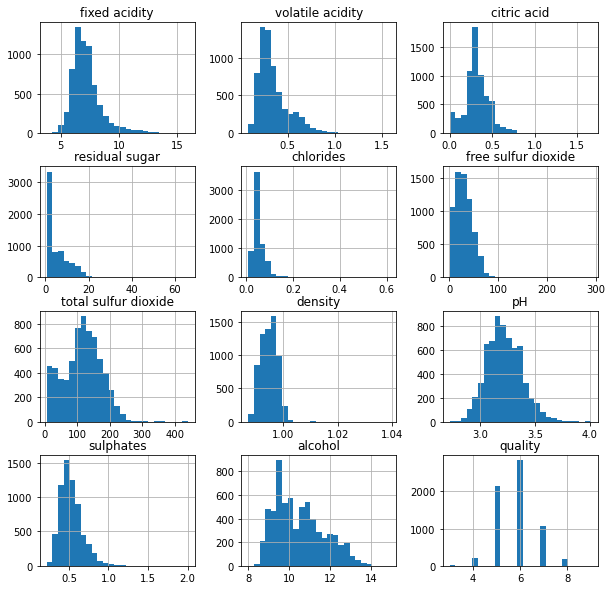

In [3]:
df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

Text(0, 0.5, 'alcohol')

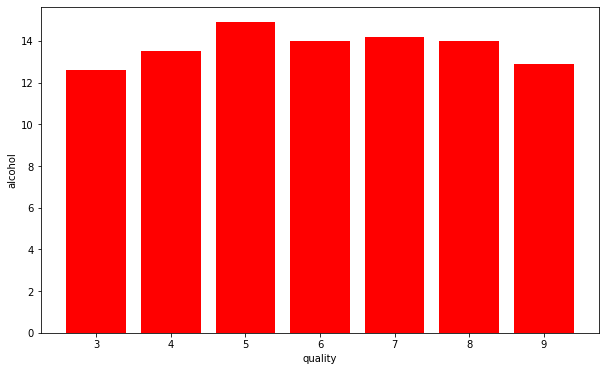

In [4]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='red')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

In [5]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

total sulfur dioxide


In [6]:
new_df=df.drop('total sulfur dioxide',axis=1)


In [7]:
new_df.isnull().sum()


type                    0
fixed acidity          10
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [8]:
new_df.update(new_df.fillna(new_df.mean()))


In [9]:
# catogerical vars 
df_dummies = pd.get_dummies(new_df,drop_first=True)
# display new dataframe
df_dummies

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.450000,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.490000,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.440000,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.531215,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.750000,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.710000,10.2,5,0


In [10]:
df_dummies['best quality'] = [ 1 if x>=7 else 0 for x in df.quality] 
print(df_dummies)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [11]:
df_dummies = df_dummies.drop('quality', axis =1)

In [12]:
x = df_dummies.iloc[:, 0:11].values
y = df_dummies.iloc[:, 11:12].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [13]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)

[[0.34710744 0.1        0.22289157 ... 0.14044944 0.26086957 1.        ]
 [0.20661157 0.18       0.15662651 ... 0.15168539 0.11594203 1.        ]
 [0.24793388 0.06666667 0.18072289 ... 0.16853933 0.14492754 1.        ]
 ...
 [0.33884298 0.38666667 0.         ... 0.20224719 0.2173913  0.        ]
 [0.24793388 0.34       0.06024096 ... 0.25280899 0.24637681 0.        ]
 [0.19008264 0.16666667 0.19277108 ... 0.24157303 0.2173913  1.        ]]


In [14]:
new_xtrain.size

57167

In [82]:
y_test.size

1300

In [83]:
# importing modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#creating RandomForestClassifier constructor
from sklearn.metrics import mean_squared_error

rnd = RandomForestClassifier()
# fit data
fit_rnd = rnd.fit(new_xtrain,y_train)
# predicting score
rnd_score = rnd.score(new_xtest,y_test)
print('score of model is : ',rnd_score)
# display error rate
print('calculating the error')

#x_predict = list(rnd.predict(new_xtest))
x_predict = (rnd.predict(new_xtest))


# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,x_predict)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)
print(classification_report(x_predict,y_test))

<ipython-input-83-d4388c148977>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit_rnd = rnd.fit(new_xtrain,y_train)


score of model is :  0.8715384615384615
calculating the error
mean squared error is :  0.12846153846153846
root mean squared error is :  0.3584153156068229
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1126
           1       0.51      0.80      0.62       174

    accuracy                           0.87      1300
   macro avg       0.74      0.84      0.77      1300
weighted avg       0.91      0.87      0.88      1300



In [101]:
predicted_df = np.column_stack((x_predict,y_test))
predicted_df

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 1],
       [0, 0],
       [0, 0]], dtype=int64)

In [103]:
#creating new dataframe
pd.DataFrame(predicted_df, columns = ['predicted_value', 'original_values'])

,predicted_value,original_values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1295,0,0
1296,0,0
1297,0,1
1298,0,0


In [105]:
import pickle
file = 'wine_qualityforthefirsttimeever'
#save file
save = pickle.dump(rnd,open(file,'wb'))